In [39]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('output_backup.csv', low_memory=False)

In [41]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status
0,COOLEMORE COUNT,YVRYL,9.770000e+14,12/02/2022,B,12/02/2022,EUT,07/12/2023 14:41,EUT
1,SPOOK MAGOO,UNBET,9.720000e+14,10/10/2018,D,21/04/2019,EUT,07/12/2023 12:24,EUT
2,PECKIES DAFFY,VYRAJ,9.720000e+14,07/05/2021,B,26/03/2020,EUT,07/12/2023 11:34,EUT
3,SPOOK MAGOO,UNBET,9.720000e+14,10/10/2018,D,21/04/2019,RET,07/12/2023 11:24,RAC
4,SHELONE KING,UUKTL,9.720000e+14,15/04/2019,D,15/04/2019,EUT,07/12/2023 10:25,EUT
...,...,...,...,...,...,...,...,...,...
233750,KNOCKGLASS KING,VPISU,9.770000e+14,01/04/2021,D,18/03/2020,EUT,NaN,EUT
233751,HELLO HOLLIE,TDVXR,9.720000e+14,23/04/2021,B,04/08/2018,EUT,NaN,EUT
233752,SEOMRA DISC,UYIKE,9.720000e+14,04/05/2021,D,12/12/2019,EUT,NaN,EUT
233753,KILWEST NOAH,VVTMH,9.770000e+14,24/11/2021,D,20/09/2020,EUT,NaN,EUT


In [42]:
df['Status'] == 'DIE'

0         False
1         False
2         False
3         False
4         False
          ...  
233750    False
233751    False
233752    False
233753    False
233754    False
Name: Status, Length: 233755, dtype: bool

In [43]:
# Convert 'OccuredAt' to datetime
df['OccuredAt'] = pd.to_datetime(df['OccuredAt'])

In [44]:
df['Year'] = df['OccuredAt'].dt.year

In [45]:
# Filter the DataFrame for the year 2021 and 'Status' equal to 'DIE'
filtered_data1 = df[(df['Year'] == 2023) & (df['Status'] == 'DIE')]

# Count the entries
count_for_2021_died = len(filtered_data1)

In [46]:
count_for_2021_died

2065

C:\Users\danma\AppData\Local\Temp\ipykernel_5892\658603539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['OccuredAt'] = pd.to_datetime(df['OccuredAt'])
C:\Users\danma\AppData\Local\Temp\ipykernel_5892\658603539.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['OccuredAt'].dt.year


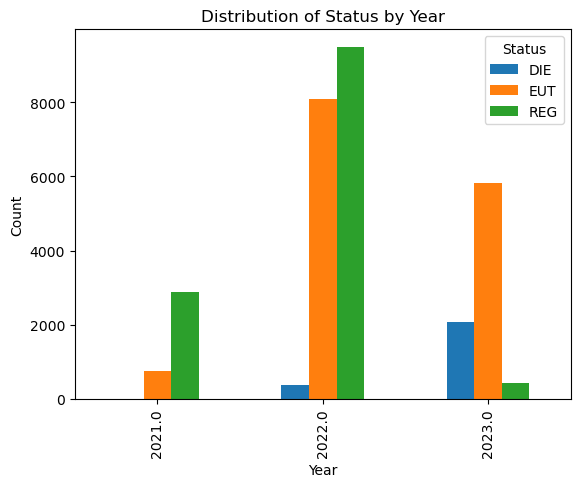

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
# Filter the DataFrame to exclude 'Status' values 'RAC'
df_filtered = df[df['Status'] != 'RAC']

# Convert 'OccuredAt' to datetime
df_filtered['OccuredAt'] = pd.to_datetime(df['OccuredAt'])

# Extract the year from 'OccuredAt'
df_filtered['Year'] = df_filtered['OccuredAt'].dt.year

# Group by year and count 'Status' entries
yearly_status_counts = df_filtered.groupby('Year')['Status'].value_counts().unstack(fill_value=0)

# Create a bar chart for each year
yearly_status_counts.plot(kind='bar')
plt.title('Distribution of Status by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.show()


In [5]:
# Define features (X) and target variable (y)
X = df.drop(["Status"], axis=1)
y = df["Status"]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

In [8]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [10]:
# Drop rows with NaN values
df = df.dropna()

In [11]:
# Convert date columns to datetime format
df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])
df["Reg Date"] = pd.to_datetime(df["Reg Date"])

C:\Users\danma\AppData\Local\Temp\ipykernel_12012\2397251886.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])
C:\Users\danma\AppData\Local\Temp\ipykernel_12012\2397251886.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Reg Date"] = pd.to_datetime(df["Reg Date"])


In [12]:
df = pd.get_dummies(df, columns=["Sex", "Retirement Type"], drop_first=True)


In [13]:
df.isna().sum()

Greyhound Name         0
Earmark                0
Microchip              0
Reg Date               0
Whelp Date             0
OccuredAt              0
Status                 0
Sex_D                  0
Retirement Type_EUT    0
Retirement Type_NEW    0
Retirement Type_RET    0
dtype: int64

In [14]:
# Create features and target variables
X = df.drop(["Status"], axis=1)  # Features
y = df["Status"]  # Target

In [15]:
X

,Greyhound Name,Earmark,Microchip,Reg Date,Whelp Date,OccuredAt,Sex_D,Retirement Type_EUT,Retirement Type_NEW,Retirement Type_RET
0,COOLEMORE COUNT,YVRYL,9.772000e+14,2022-12-02,2022-12-02,2023-07-12 14:41:00,0,1,0,0
1,SPOOK MAGOO,UNBET,9.722740e+14,2018-10-10,2019-04-21,2023-07-12 12:24:00,1,1,0,0
2,PECKIES DAFFY,VYRAJ,9.722740e+14,2021-07-05,2020-03-26,2023-07-12 11:34:00,0,1,0,0
3,SPOOK MAGOO,UNBET,9.722740e+14,2018-10-10,2019-04-21,2023-07-12 11:24:00,1,0,0,1
4,SHELONE KING,UUKTL,9.722740e+14,2019-04-15,2019-04-15,2023-07-12 10:25:00,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
229956,KIWI SANDY,UTRBS,9.722740e+14,2019-12-09,2019-10-26,2021-10-01 06:01:00,0,1,0,0
229957,COUGARS HERO,USQIE,9.722740e+14,2020-02-18,2019-01-10,2021-10-01 06:01:00,1,1,0,0
229958,CLASSIC SYLVIA,UBDZZ,9.722740e+14,2021-04-15,2019-03-10,2021-10-01 06:01:00,0,0,0,0
229959,VIEW HERMOINE,UPVXM,9.722740e+14,2019-04-10,2019-12-06,2021-10-01 06:01:00,0,1,0,0


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification


In [18]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).